# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 6. 10. 2024. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

Načteme si data z datasetu a pomocí funcke info() si zobrazíme datové typy sloupců

In [5]:
# a teď už je to na vás 💪
# níže vložte své řešení

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ins = pd.read_csv('intakes.csv')
outs = pd.read_csv('outcomes.csv')
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


In [6]:
outs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119476 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  167556 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167559 non-null  object
 11  Color             167559 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


Za pomoci ChatGPT si vytvoříme funkci na konverzi atributu Age upon Intake na dny, abychom ho mohli přetypovat na numerický atribut. Zároveň doplníme prázdné hodnoty a přetypujeme ostatní příznaky.

In [8]:
def convertToDays(duration):  
    # Use regex to split numeric value and time unit
    if(duration == 'Unknown'):
        return '-1'
    words = duration.split(' ')

    value = int(words[0])
    unit = words[1]


    # Convert to days based on unit
    if unit == 'year' or unit == 'years':
        return str(value * 365)  # Approximate
    elif unit == 'month' or unit == 'months':
        return str(value * 30)   # Approximate
    elif unit == 'week' or unit == 'weeks':
        return str(value * 7)
    elif unit == 'day' or unit == 'days':
        return str(value)
    else:
        return 'error'  # Handle unexpected units



In [9]:
ins["Age upon Intake"] = ins["Age upon Intake"].astype("string")
#ins['Name'] = ins['Name'].fillna('Unknown')
ins['Sex upon Intake'] = ins['Sex upon Intake'].fillna('Unknown')

ins['Age upon Intake'] = ins['Age upon Intake'].fillna('Unknown')
ins['Age upon Intake'] = ins['Age upon Intake'].apply(convertToDays)
ins['Age upon Intake'] = ins['Age upon Intake'].astype('int')


outs['Age upon Outcome'] = outs['Age upon Outcome'].astype('string')
outs['Age upon Outcome'] = outs['Age upon Outcome'].fillna('Unknown')
outs['Age upon Outcome'] = outs['Age upon Outcome'].apply(convertToDays)
outs['Age upon Outcome'] = outs['Age upon Outcome'].astype('int')

In [10]:
ins["Intake Type"] = ins["Intake Type"].astype("category")
ins["Intake Condition"] = ins["Intake Condition"].astype("category")
ins["Animal Type"] = ins["Animal Type"].astype("category")
ins["Sex upon Intake"] = ins["Sex upon Intake"].astype("category")
ins["Breed"] = ins["Breed"].astype("category")
ins["Color"] = ins["Color"].astype("category")
ins["DateTime"] = pd.to_datetime(ins["DateTime"], format = '%m/%d/%Y %I:%M:%S %p')


outs['Name'] = outs['Name'].astype('string')
outs['DateTime'] = pd.to_datetime(outs["DateTime"], format = '%m/%d/%Y %I:%M:%S %p')
outs['Date of Birth'] = pd.to_datetime(outs["Date of Birth"], format = '%m/%d/%Y')
outs['Outcome Type'] = outs['Outcome Type'].astype('category')
outs['Outcome Type'] = outs['Outcome Type'].astype('category')
outs['Outcome Subtype'] = outs['Outcome Subtype'].astype('category')
outs['Animal Type'] = outs['Animal Type'].astype('category')
outs['Sex upon Outcome'] = outs['Sex upon Outcome'].astype('category')
outs['Breed'] = outs['Breed'].astype('category')
outs['Color'] = outs['Color'].astype('category')




Vypíšeme si všechny duplicitní řádky. Vidíme, že máme 32 duplicit a ty pomocí metody .drop_duplicates odstraníme.

In [12]:
tmp = ins[ins.duplicated(keep = False)]
ins = ins.drop_duplicates(keep = False)
tmp

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
4329,A830075,Waffle,2021-03-02 13:35:00,March 2021,Onion Creek And Pleasant Valley in Austin (TX),Stray,Normal,Dog,Intact Male,365,Chihuahua Shorthair Mix,Tan
4330,A830075,Waffle,2021-03-02 13:35:00,March 2021,Onion Creek And Pleasant Valley in Austin (TX),Stray,Normal,Dog,Intact Male,365,Chihuahua Shorthair Mix,Tan
8331,A696688,Mari,2015-02-10 11:00:00,February 2015,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,1095,Domestic Shorthair Mix,Calico/White
8332,A696688,Mari,2015-02-10 11:00:00,February 2015,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,1095,Domestic Shorthair Mix,Calico/White
10871,A727043,*Larry,2016-05-17 15:46:00,May 2016,9515 N Lamar Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,365,Domestic Shorthair Mix,Blue/White
...,...,...,...,...,...,...,...,...,...,...,...,...
158516,A857222,Keanu,2022-05-13 13:58:00,May 2022,1800 S Ih 35 in Austin (TX),Owner Surrender,Normal,Other,Intact Male,240,Guinea Pig,White/Gray
162411,A783234,Princess,2018-11-01 14:36:00,November 2018,Austin (TX),Public Assist,Normal,Dog,Intact Female,730,Collie Smooth/Pointer,Brown
162412,A783234,Princess,2018-11-01 14:36:00,November 2018,Austin (TX),Public Assist,Normal,Dog,Intact Female,730,Collie Smooth/Pointer,Brown
167210,A913327,Star,2024-09-28 16:11:00,September 2024,Curtis And Braun Way in Travis (TX),Stray,Normal,Dog,Spayed Female,730,Belgian Malinois,Brown/Black


To samé i pro outs

In [14]:
outs = outs.drop_duplicates(keep = False)

Odstraníme řádky, které mají Age upon Intake/Outcome menší než 0.

In [16]:
ins = ins[ins['Age upon Intake'] >= 0]
ins. info()

outs = outs[outs['Age upon Outcome'] >= 0]


<class 'pandas.core.frame.DataFrame'>
Index: 167482 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167482 non-null  object        
 1   Name              119275 non-null  object        
 2   DateTime          167482 non-null  datetime64[ns]
 3   MonthYear         167482 non-null  object        
 4   Found Location    167482 non-null  object        
 5   Intake Type       167482 non-null  category      
 6   Intake Condition  167482 non-null  category      
 7   Animal Type       167482 non-null  category      
 8   Sex upon Intake   167482 non-null  category      
 9   Age upon Intake   167482 non-null  int32         
 10  Breed             167482 non-null  category      
 11  Color             167482 non-null  category      
dtypes: category(6), datetime64[ns](1), int32(1), object(4)
memory usage: 9.7+ MB


Definujeme funkci pro základní statistiky a vykreslíme graf atributu Age upon Intake

Maximum:  10950 
Minimum:  0 
Average:  710.0819371633967 
Median:  365.0


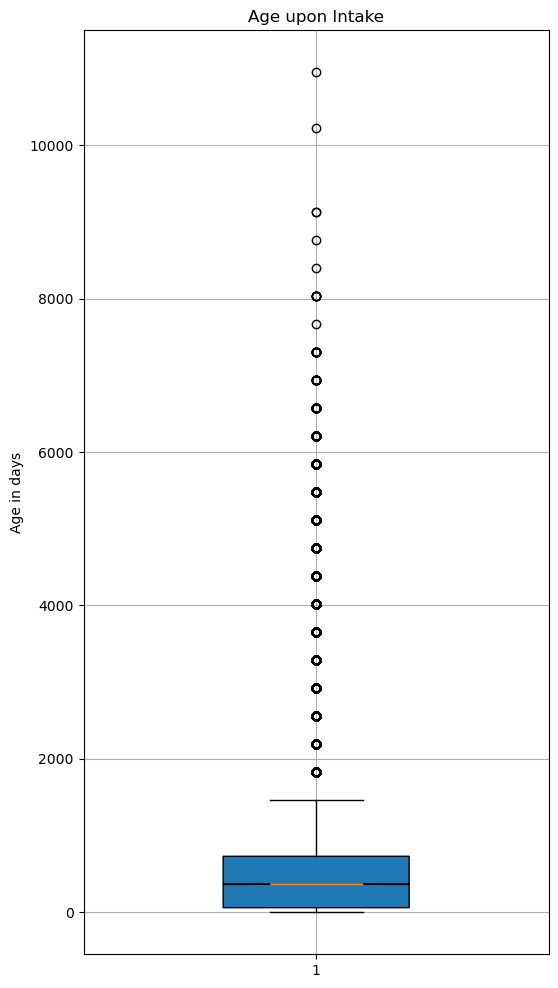

In [18]:
def getBasicStats(data):
    max = data.max()
    min = data.min()
    avg = data.mean()
    med = data.median()
    print('Maximum: ', max, "\nMinimum: ", min, "\nAverage: ", avg, "\nMedian: ", med)

data = ins['Age upon Intake']

fig, ax = plt.subplots(figsize=(6, 12))
plt.boxplot(data, widths=0.4, patch_artist = True, notch = True)
ax.set_title('Age upon Intake')

getBasicStats(data)
plt.grid(True)
plt.ylabel('Age in days')
plt.show()


Z vizualizace můžeme vidět, že minimem datasetu je 0, což je logicky správně. Dále vidíme, že většina zvířat má při příjmu věk menší než 6 let (2190 dní). Existují zde ale také outlieři, kteří se mohou vyšplhat až na 30 let (10 950 dní). Tyto outliery si můžeme zobrazit. Vidíme, že jich je skoro 17 000 a nejstarší je 10950 dní starý

In [20]:
ins[ins['Age upon Intake'] >= 2000]

oldest = ins['Age upon Intake'].max()

print("Oldest: ", oldest)

Oldest:  10950


Atribut DateTime v intakes eviduje, kdy bylo zvíře přijmuto do útulku. Pro atribut DateTime si zjistíme jeho minimum a maximum

In [22]:
getBasicStats(ins['DateTime'].dt.year)

Maximum:  2024 
Minimum:  2013 
Average:  2018.1787654792754 
Median:  2018.0


Časový rozptyl dat je od roku 2013 do roku 2024. Zvolíme proto histogram kde každý sloupec bude rok a počet záznamů z toho roku

Maximum:  19723 
Minimum:  4182 
Average:  13956.833333333334 
Median:  14501.5


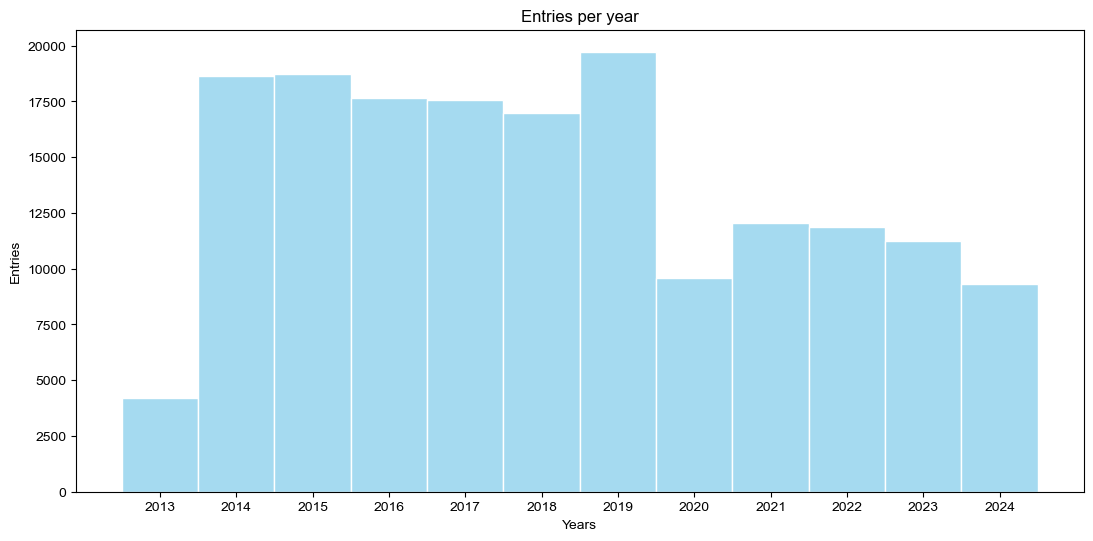

In [24]:
years = ins['DateTime'].dt.year
years.value_counts().sort_index()

getBasicStats(years.value_counts())


ticks = years.unique()
ticks.sort()


plt.figure(figsize=(13, 6))
plt.xticks(ticks)
sns.set_theme(style = 'whitegrid')
sns.histplot(data = years, color = 'skyblue', discrete = True).set(title = 'Entries per year')
plt.xlabel('Years')
plt.ylabel('Entries')
plt.show()


Můžeme vidět, že nejvíce evidovaných případů je v letech 2014 až 2019.

<h3>Atribut Animal Type<h3>

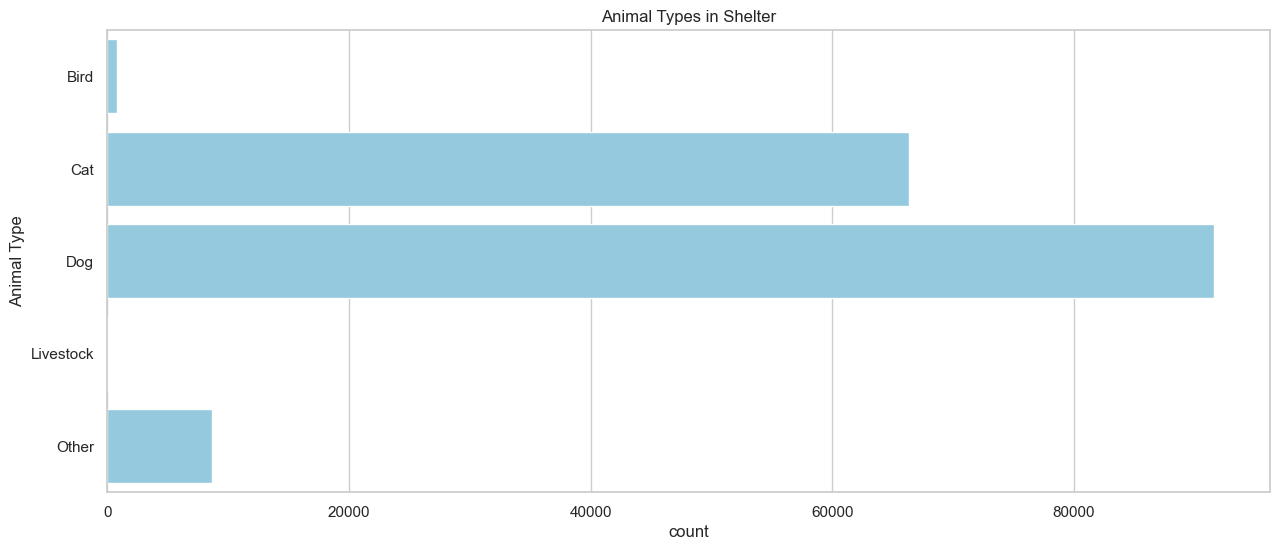

In [27]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.countplot(ins['Animal Type'], color = 'skyblue').set(title = 'Animal Types in Shelter')
plt.show()

Z grafu vidíme, že psi a kočky prošli útelkem nejvíckrát. U dobytku by se mohlo zdát, že žádní nejsou. Po dalším zkoumání zjistíme, že  jich je v datech pouze 30, takže to vzhledem k celkovému počtu dat není na grafu vidět.

In [29]:
test = ins[ins['Animal Type'] == 'Livestock']
test.count()


Animal ID           30
Name                 5
DateTime            30
MonthYear           30
Found Location      30
Intake Type         30
Intake Condition    30
Animal Type         30
Sex upon Intake     30
Age upon Intake     30
Breed               30
Color               30
dtype: int64

<h3>Atribut Intake Type<h3>

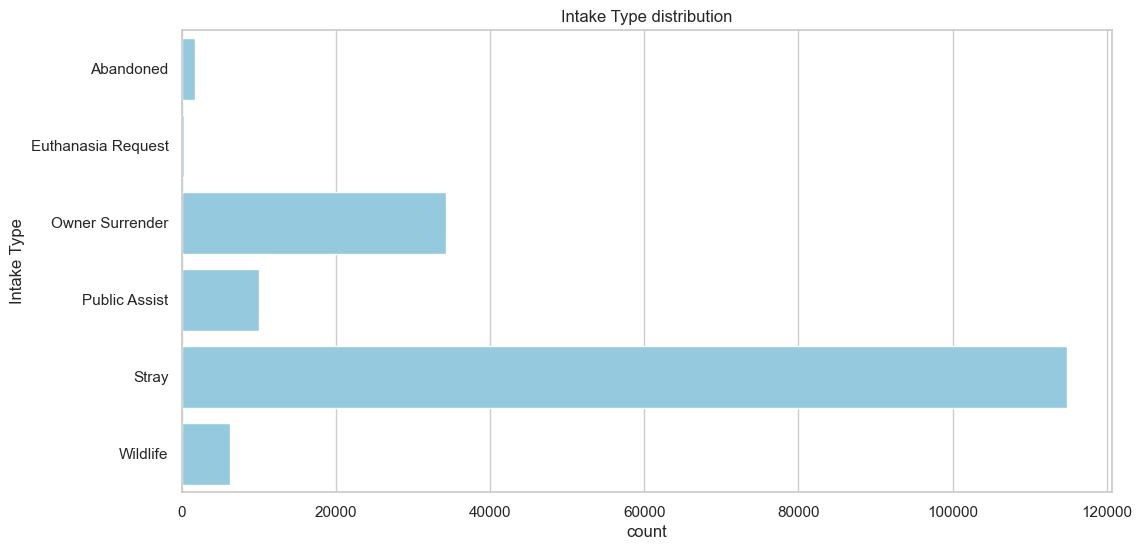

In [31]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(ins['Intake Type'], color = 'skyblue')
plt.title('Intake Type distribution')
plt.show()

Zde vidíme že velká většina zvířat příjmaná do útulku jsou zatoulaná zvířata. Dále by se dalo zkoumat, zda typ zvířete, ovlivňuje jak byl do úto

<h3>Atribut Intake Condition<h3>

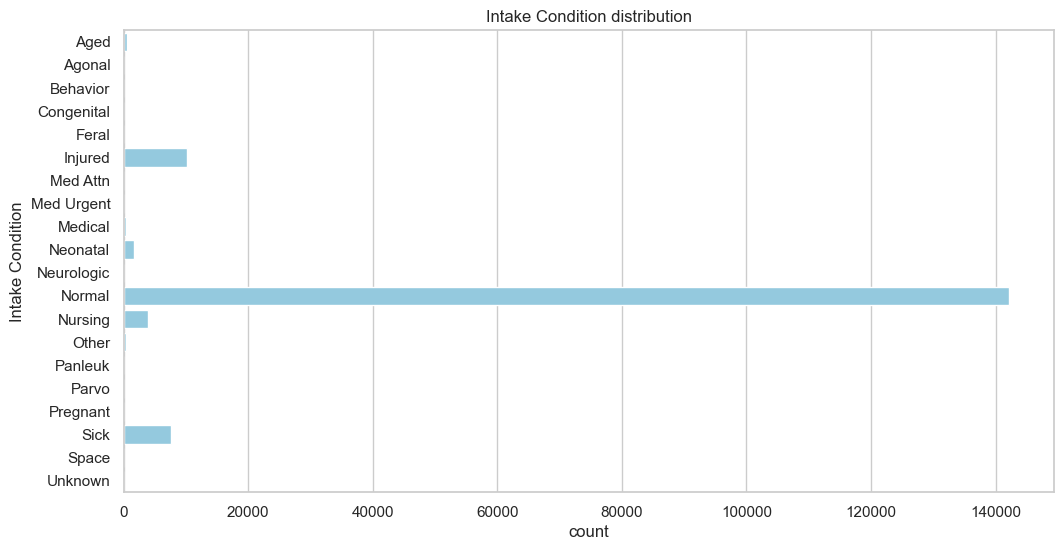

In [34]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(ins['Intake Condition'], color = 'skyblue')
plt.title('Intake Condition distribution')
plt.show()

Vidíme, že stav Normal hodně převažuje ostatní parametry a není tak úplně vidět jak na to ostatní parametry jsou. Proto si tento parametr na chvíli odebereme a podíváme se na zbytek příznaků.

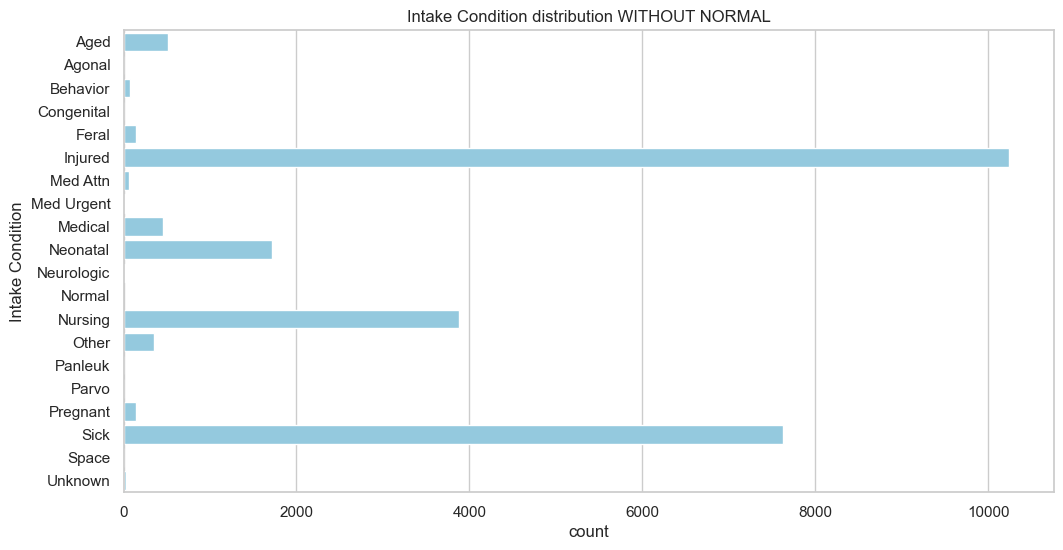

In [36]:
fig, ax = plt.subplots(figsize = (12, 6))
withoutNormal = ins[ins['Intake Condition'] != 'Normal']
sns.countplot(withoutNormal['Intake Condition'], color = 'skyblue')
plt.title('Intake Condition distribution WITHOUT NORMAL')
plt.show()

Pro bivariační statistiku si vyberu vztah mezi plemem zvířete a jeho barvou

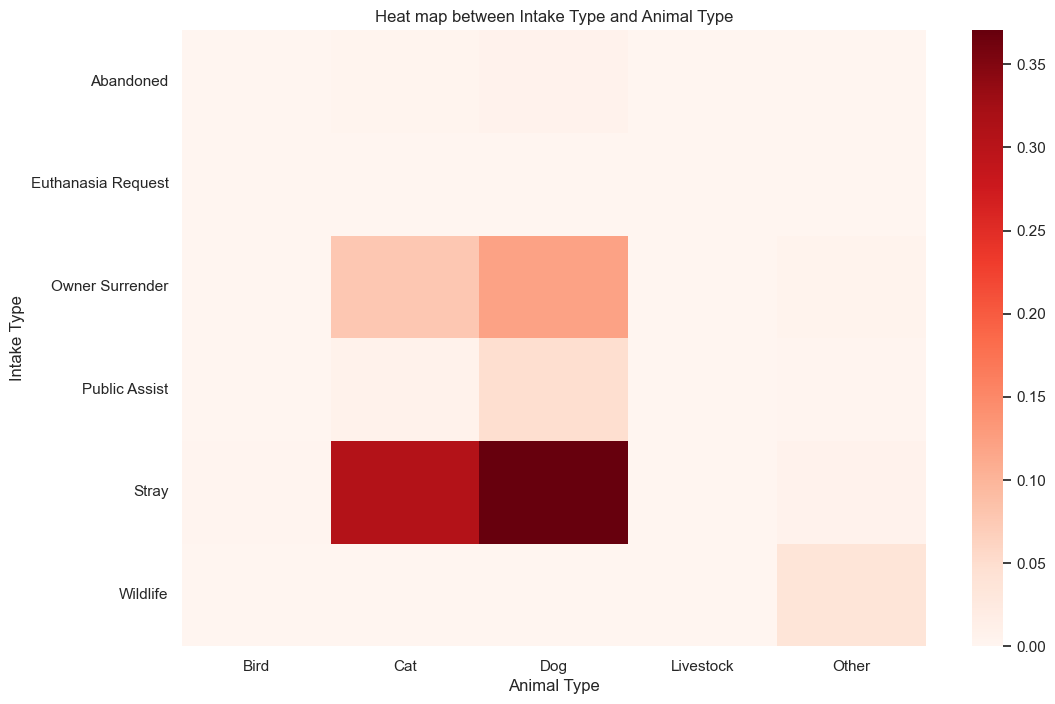

In [38]:
fig, ax = plt.subplots(figsize = (12, 8))
cross = pd.crosstab(ins['Intake Type'], ins['Animal Type'])

sns.heatmap(cross.div(len(ins)), cmap = 'Reds')
plt.title('Heat map between Intake Type and Animal Type')
plt.show()

Z mapy lze vidět, že zaběhlá zvířata jsou nejvíce psi a kočky. Ty vedou také v kategoriích Public assist a Owner Surrender.

Jako druhou si můžeme zobrazit vztah mezi **typem zvířete a a jeho outcome typem**.

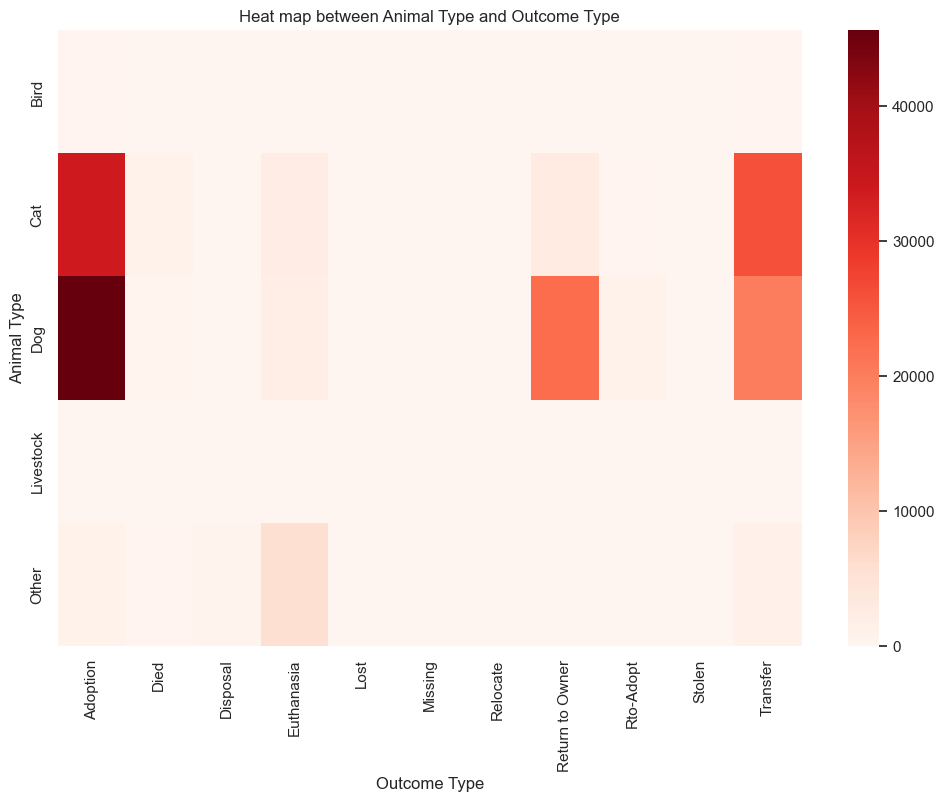

In [41]:
fig, ax = plt.subplots(figsize = (12, 8))
cross = pd.crosstab(outs['Animal Type'], outs['Outcome Type'])

sns.heatmap(cross, cmap = 'Reds')
plt.title('Heat map between Animal Type and Outcome Type')
plt.show()

Z grafu je vidět že nejvíce jdou k adopci psi a kočky. Tyto dva typy převažují i u zvířat daných na transfer. Hodně psů se také vrátí svým majitelům. Neočekávaným znakem je, že zvířata z kategorie other dostávají eutanázii vcelku hodně.

<h2>Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?<h2>

Jako u předchozích příkladů si můžeme vykreslit heatmapu mezi těmito dvěmi proměnými.

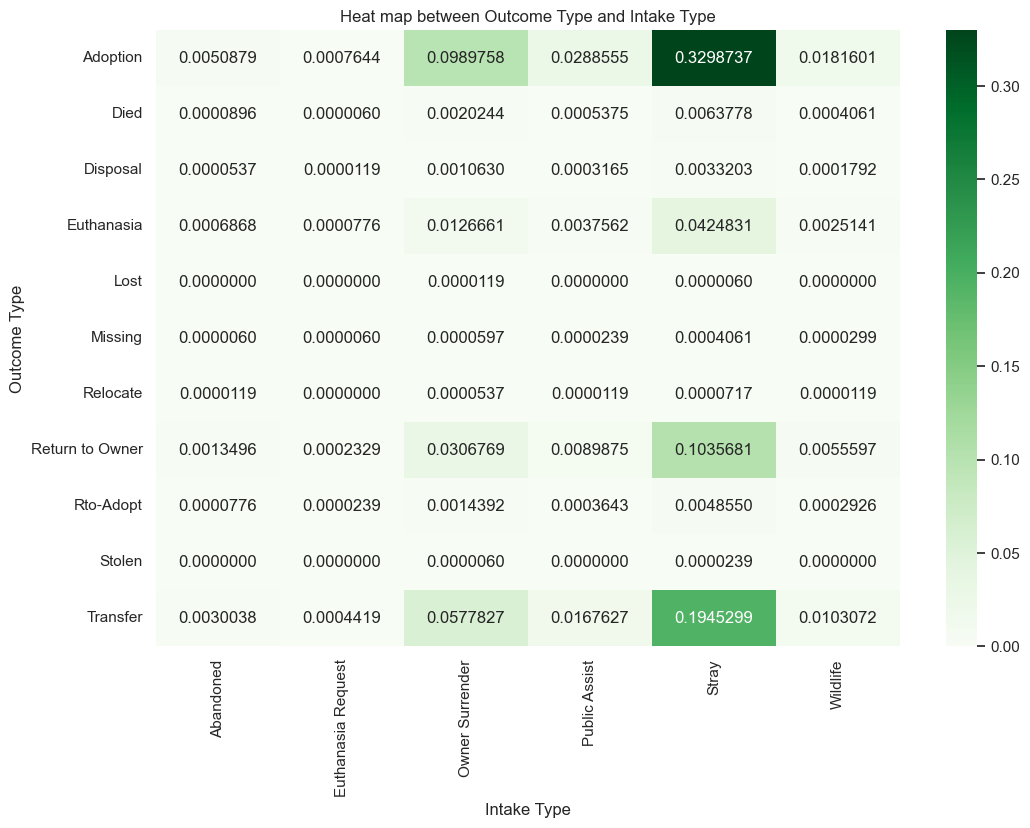

In [45]:
fig, ax = plt.subplots(figsize = (12, 8))
cross = pd.crosstab(outs['Outcome Type'], ins['Intake Type'])

sns.heatmap(cross.div(len(outs)), cmap = 'Greens', annot = True, fmt = '.7f')
plt.title('Heat map between Outcome Type and Intake Type')
plt.show()

Většina typů na sebe nemá skoro žádný vliv. Existují zde ale jisté výjimky, jako třeba u zatoulaných zvířat, kde je jich hodně z útulku adoptováno. Zatoulaná zvířata, jsou také časté přemísťována a často se vrací ke svým vlastníkům.

<h2>Hraje věk zvířete roli při adopci?<h2>

Vybereme si pouze sloupce s Outcome Typem 'Adoption'. Ty zobrazíme v boxplotu abychom zjistili, kde leží nejvíce hodnot.

Maximum:  7300 
Minimum:  0 
Average:  573.8948959740276 
Median:  240.0


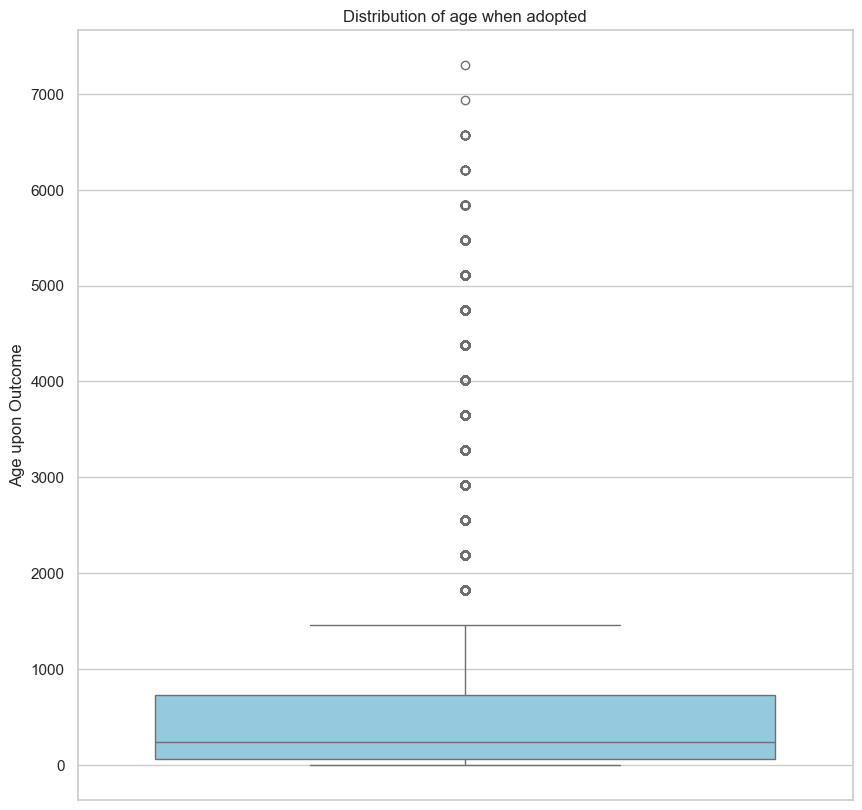

In [49]:
d = outs[outs['Outcome Type'] == 'Adoption']['Age upon Outcome']
getBasicStats(d)

plt.figure(figsize=(10, 10))
sns.boxplot(d, color = 'skyblue')

plt.title('Distribution of age when adopted')
plt.show()



Z grafu je jasně vidět, že převažují spodní hodnoty, takže lidé adoptují spíše mladší zvířata než starší.

<h2>Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?<h2>

Za pomoci ChatGPT si groupneme měsíce a roky, z nich pak vytvoříme průměrný měsíční příjem. 

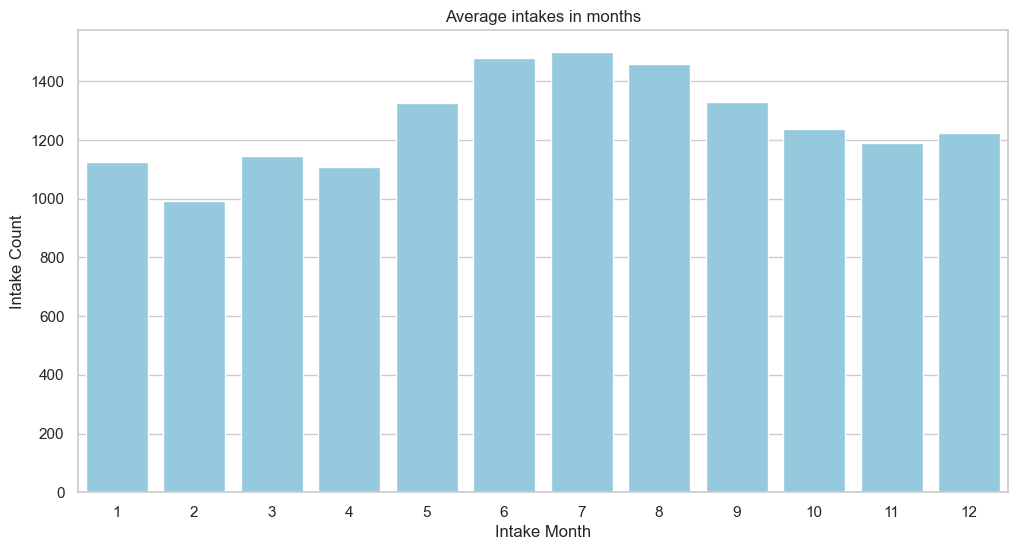

In [53]:
months = outs

months['Intake Month'] = months['DateTime'].dt.month
months['Intake Year'] = months['DateTime'].dt.year
grouped = months.groupby(['Intake Month', 'Intake Year']).size().reset_index(name='Intake Count')

average = grouped.groupby('Intake Month')['Intake Count'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data=average, color = 'skyblue')
plt.title('Average intakes in months')
plt.show()

Můžeme vidět, že v letních měsících je průměrný měsíční příjem větší než v zimních měsících.

<h2>Jaké plemeno psů si lidé adoptují nejvíce? (Top 10)<h2>

Groupneme si data podle plemena a u každého si poznamenámu počet výskytů do nového sloupce. Ty pak seřadíme a zobrazíme.

In [57]:
d = outs[outs['Outcome Type'] == 'Adoption']

grouped = d.groupby('Breed', observed = False).size().reset_index(name='Count')

grouped = grouped.sort_values('Count', ascending = False)
grouped.head(10)

,Breed,Count
1311,Domestic Shorthair Mix,15719
1310,Domestic Shorthair,12122
1774,Labrador Retriever Mix,4728
2235,Pit Bull Mix,4273
940,Chihuahua Shorthair Mix,3297
1462,German Shepherd Mix,2231
1306,Domestic Medium Hair Mix,1679
2234,Pit Bull,1592
1305,Domestic Medium Hair,1166
167,Australian Cattle Dog Mix,1142


Z tabulky můžeme jasně vidět, že nejadoptovanějším plemenem je Domestic Shorthair Mix.

<h2>Jak dopadla zvířata, která opustila útulek jako transfer<h2>

Vyseparujeme zvířata s Outcome Type 'Transfer'

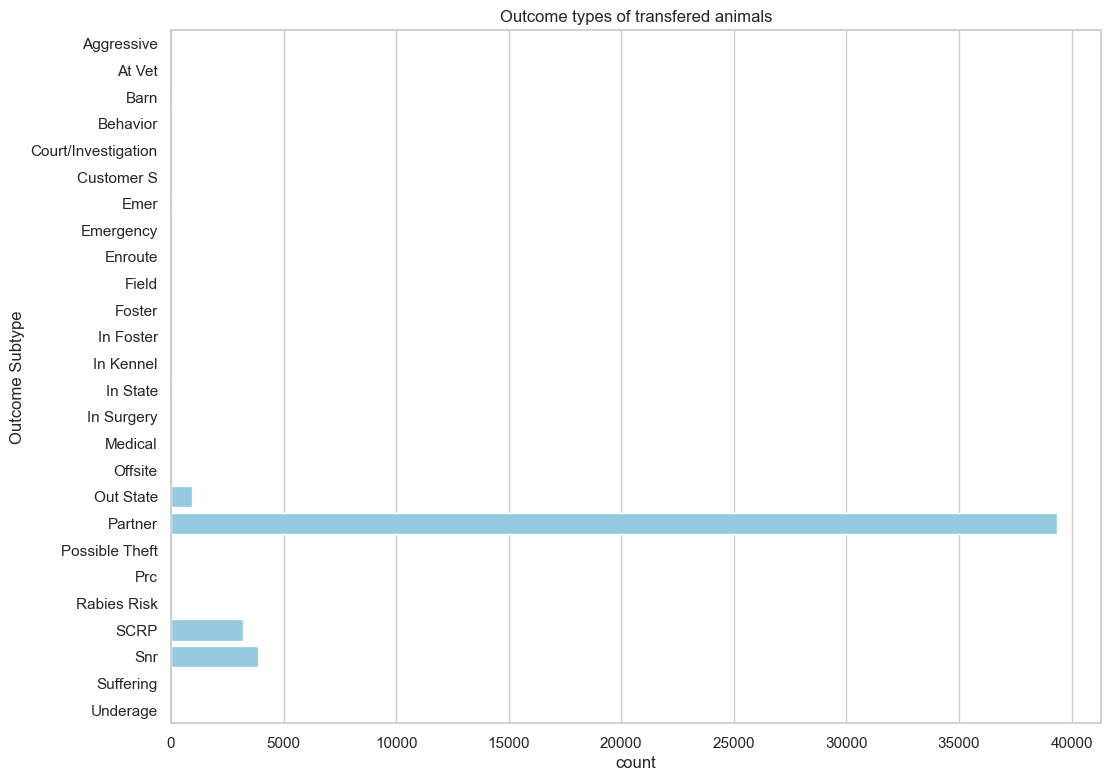

In [61]:
q2 = outs[outs['Outcome Type'] == 'Transfer']
fig, ax = plt.subplots(figsize = (12,9))
sns.countplot(q2['Outcome Subtype'], color = 'skyblue')
plt.title('Outcome types of transfered animals')
plt.show()

In [62]:
q2['Outcome Subtype'].value_counts()

Outcome Subtype
Partner                39338
Snr                     3876
SCRP                    3205
Out State                931
Barn                      13
In State                  12
Emer                      10
In Surgery                 0
Suffering                  0
Rabies Risk                0
Prc                        0
Possible Theft             0
Offsite                    0
Medical                    0
Aggressive                 0
At Vet                     0
In Kennel                  0
In Foster                  0
Foster                     0
Field                      0
Enroute                    0
Emergency                  0
Customer S                 0
Court/Investigation        0
Behavior                   0
Underage                   0
Name: count, dtype: int64

Vidíme, že partner je nejčastější možnost. Tabulka nám pomůže podívat se na menší hodnoty, které díky velkému počtu partner subtypů nejsou v grafu vidět.

<h2>Která zvířata bývají nejčastěji přijmaná jako nemocná<h2>

Vyseparujeme 'Sick' Intake Condition a tu zobrazíme

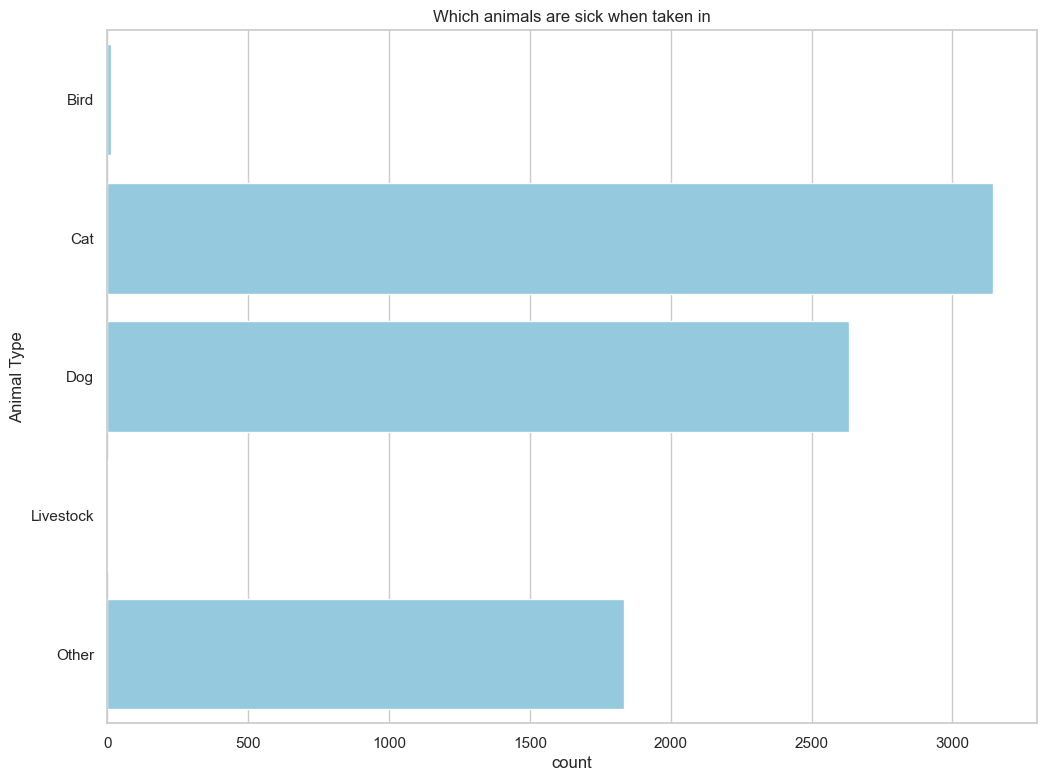

In [66]:
q3 = ins[ins['Intake Condition'] == 'Sick']
fig, ax = plt.subplots(figsize = (12,9))
sns.countplot(q3['Animal Type'], color = 'skyblue')
plt.title('Which animals are sick when taken in')
plt.show()



Nejčastěji bývají nemocné při příjmu kočky, a to i přes to, že psů je více než koček. Naopak ptáci a dobytek nejsou nemocní při příjmu prakticky vůbec